In [1]:
import importlib
import logging
import time

import numba
import numpy as np

import deduce_asymptotics
from deduce_asymptotics import deduce

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

2024-07-20 20:24:29,536 - Collecting data for square_log...
2024-07-20 20:24:29,666 - Iteration   0. Input length: 64, Avg time: 0.01275 ± 0.002629 seconds
2024-07-20 20:24:29,806 - Iteration   1. Input length: 70, Avg time: 0.01384 ± 0.0004508 seconds
2024-07-20 20:24:29,976 - Iteration   2. Input length: 77, Avg time: 0.01689 ± 0.001043 seconds
2024-07-20 20:24:30,175 - Iteration   3. Input length: 84, Avg time: 0.01977 ± 0.0006269 seconds
2024-07-20 20:24:30,407 - Iteration   4. Input length: 92, Avg time: 0.02307 ± 0.001123 seconds
2024-07-20 20:24:30,683 - Iteration   5. Input length: 101, Avg time: 0.02756 ± 0.0008118 seconds
2024-07-20 20:24:31,019 - Iteration   6. Input length: 111, Avg time: 0.03346 ± 0.0007411 seconds
2024-07-20 20:24:31,441 - Iteration   7. Input length: 122, Avg time: 0.04209 ± 0.0024 seconds
2024-07-20 20:24:32,022 - Iteration   8. Input length: 134, Avg time: 0.0579 ± 0.00273 seconds
2024-07-20 20:24:32,709 - Iteration   9. Input length: 147, Avg time: 0.

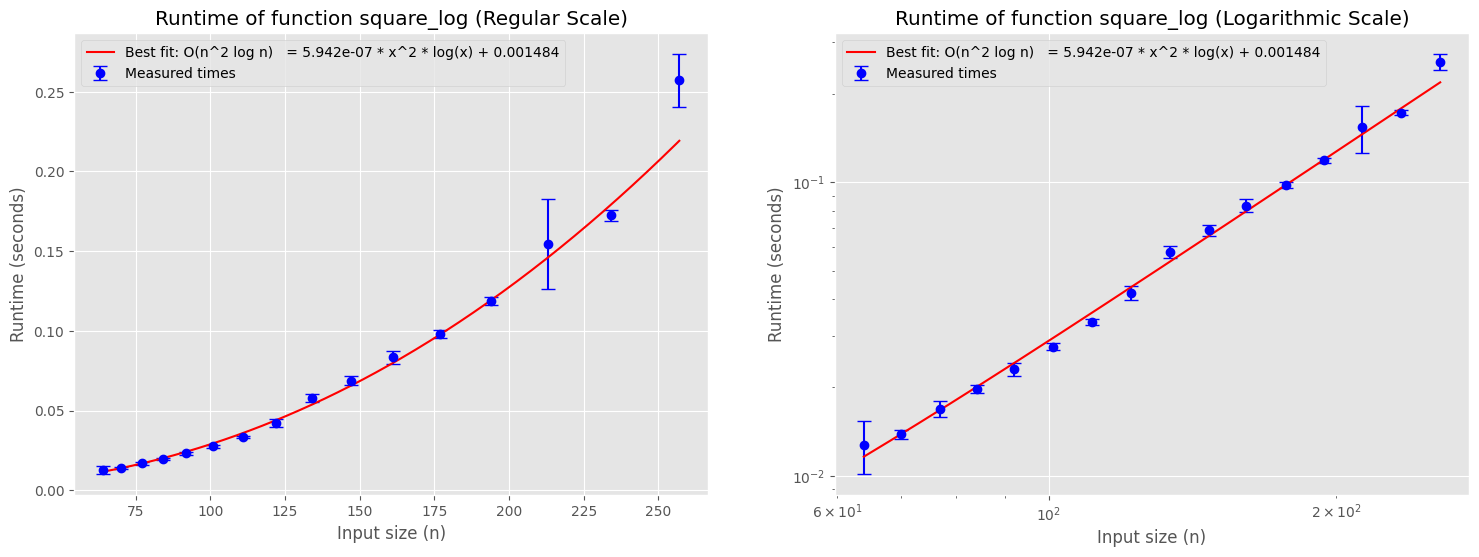

Time complexity of the function square_log is O(n^2 log n)
Time = 5.942e-07 * x^2 * log(x) + 0.001484 (sec)


In [2]:
def square_log(input_data: list) -> None:
    for i in range(len(input_data)):
        for j in range(len(input_data)):
            k = 1
            while k < len(input_data):
                input_data[i] + input_data[j] + input_data[k]
                k *= 2

def random_data(n: int) -> list:
    x = np.random.standard_normal(n)
    return x

solver, ns, ts = deduce(square_log, random_data)

In [3]:
t0 = time.perf_counter()
for cl in deduce_asymptotics.solvers.SOLVERS_ALL + deduce_asymptotics.solvers.SOLVERS_EXTRA:
    s = cl()
    s.fit(ns, ts)
    # s.fit_minimize(n, t)
    # s.fit_genetic(n, t)
    # s.fit_shgo(n, t)
    # s.fit_dual(n, t)
    # s.fit_direct(n, t)
    print(f'{s.name:15} =   {str(s):50}:   loss = {s.loss(ns, ts)}')
print(f'Time = {time.perf_counter() - t0:4g} (sec)')
# Or set flag 'extra' to True in 'deduce' function in order to get access to additional solvers
# Beware that Polynomial and PolinomialLog solvers have more paramethers and are easier to overfit


O(1)            =   0.01977                                           :   loss = 0.5599980400241185
O(log n)        =   0.004443 * log(x) + 0.0001443                     :   loss = 0.526176861926509
O(n)            =   0.0002728 * x + 1.227e-05                         :   loss = 0.36538592890794364
O(n log n)      =   5.895e-05 * x * log(x) + 7.818e-05                :   loss = 0.31091768984470125
O(n^2)          =   3.112e-06 * x^2 + 1.394e-05                       :   loss = 0.07837468448194637
O(n^2 log n)    =   5.934e-07 * x^2 * log(x) + 0.001484               :   loss = 0.047067027416053175
O(n^3)          =   1.587e-08 * x^3 + 0.009715                        :   loss = 0.08019098759993466
O(n^3 log n)    =   3.007e-09 * x^3 * log(x) + 0.01156                :   loss = 0.10350238122626304
O(e^n)          =   0.005435 * exp(0.01571 * x) + 0                   :   loss = 0.11734567448046852
O(n^p)          =   2.329e-07 * x^2.492 + 0.005167                    :   loss = 0.0357991309

2024-07-20 20:25:13,278 - Collecting data for selection_sort...
2024-07-20 20:25:13,290 - Iteration   0. Input length: 64, Avg time: 0.0009011 ± 0.0001921 seconds
2024-07-20 20:25:13,312 - Iteration   1. Input length: 70, Avg time: 0.001626 ± 0.001378 seconds
2024-07-20 20:25:13,327 - Iteration   2. Input length: 77, Avg time: 0.001276 ± 0.0004627 seconds
2024-07-20 20:25:13,344 - Iteration   3. Input length: 84, Avg time: 0.001481 ± 0.0004368 seconds
2024-07-20 20:25:13,362 - Iteration   4. Input length: 92, Avg time: 0.001626 ± 0.0003991 seconds
2024-07-20 20:25:13,380 - Iteration   5. Input length: 101, Avg time: 0.001702 ± 0.0001155 seconds
2024-07-20 20:25:13,402 - Iteration   6. Input length: 111, Avg time: 0.002039 ± 0.000399 seconds
2024-07-20 20:25:13,425 - Iteration   7. Input length: 122, Avg time: 0.00212 ± 0.0001291 seconds
2024-07-20 20:25:13,457 - Iteration   8. Input length: 134, Avg time: 0.002933 ± 0.0003367 seconds
2024-07-20 20:25:13,496 - Iteration   9. Input lengt

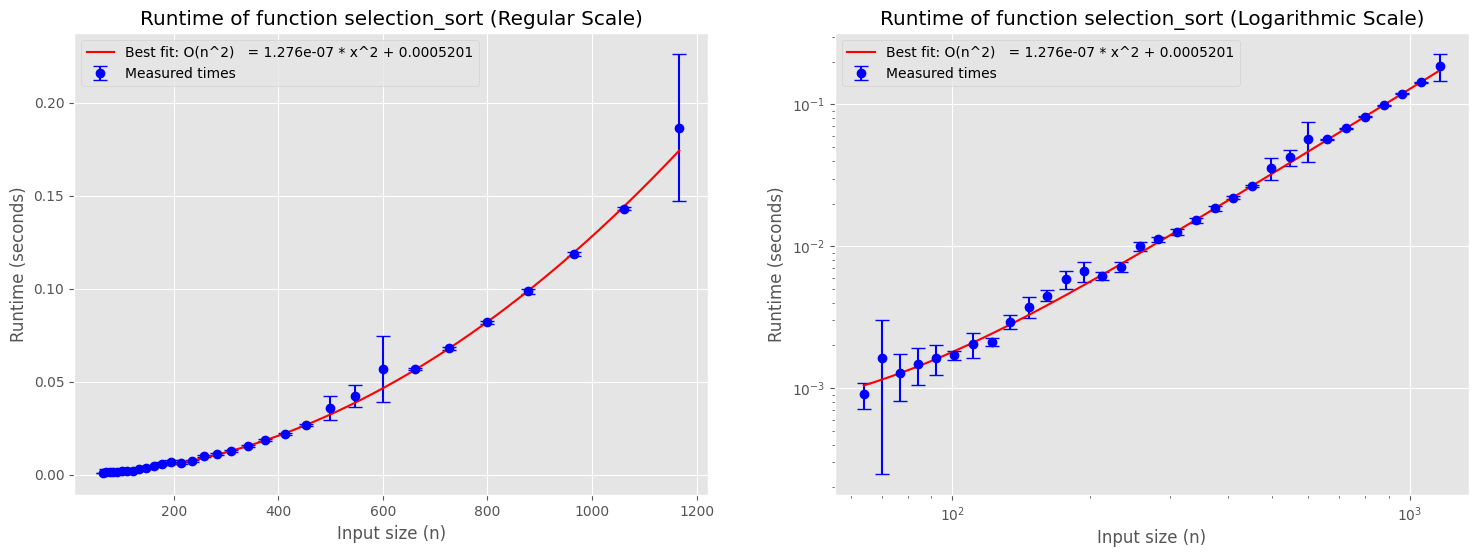

Time complexity of the function selection_sort is O(n^2)
Time = 1.276e-07 * x^2 + 0.0005201 (sec)


In [4]:
def selection_sort(input_data: list) -> None:
    for i in range(len(input_data) - 1):
        min_index = i
        for j in range(i + 1, len(input_data)):
            if input_data[j] < input_data[min_index]:
                min_index = j
        input_data[i], input_data[min_index] = input_data[min_index], input_data[i]

# logger.setLevel(logging.CRITICAL)
_ = deduce(selection_sort, random_data)

2024-07-20 20:33:13,035 - Collecting data for log_search...
2024-07-20 20:33:13,050 - Iteration   0. Input length: 100, Avg time: 1.201e-05 ± 4.278e-06 seconds
2024-07-20 20:33:13,074 - Iteration   1. Input length: 120, Avg time: 7.508e-06 ± 1.968e-06 seconds
2024-07-20 20:33:13,078 - Iteration   2. Input length: 144, Avg time: 7.258e-06 ± 2.121e-06 seconds
2024-07-20 20:33:13,080 - Iteration   3. Input length: 172, Avg time: 6.954e-06 ± 3.066e-06 seconds
2024-07-20 20:33:13,090 - Iteration   4. Input length: 206, Avg time: 1.187e-05 ± 9.462e-06 seconds
2024-07-20 20:33:13,107 - Iteration   5. Input length: 247, Avg time: 1.105e-05 ± 9.323e-06 seconds
2024-07-20 20:33:13,114 - Iteration   6. Input length: 296, Avg time: 1.231e-05 ± 1.194e-05 seconds
2024-07-20 20:33:13,116 - Iteration   7. Input length: 355, Avg time: 7.403e-06 ± 2.674e-06 seconds
2024-07-20 20:33:13,118 - Iteration   8. Input length: 426, Avg time: 6.127e-06 ± 2.41e-06 seconds
2024-07-20 20:33:13,124 - Iteration   9. 

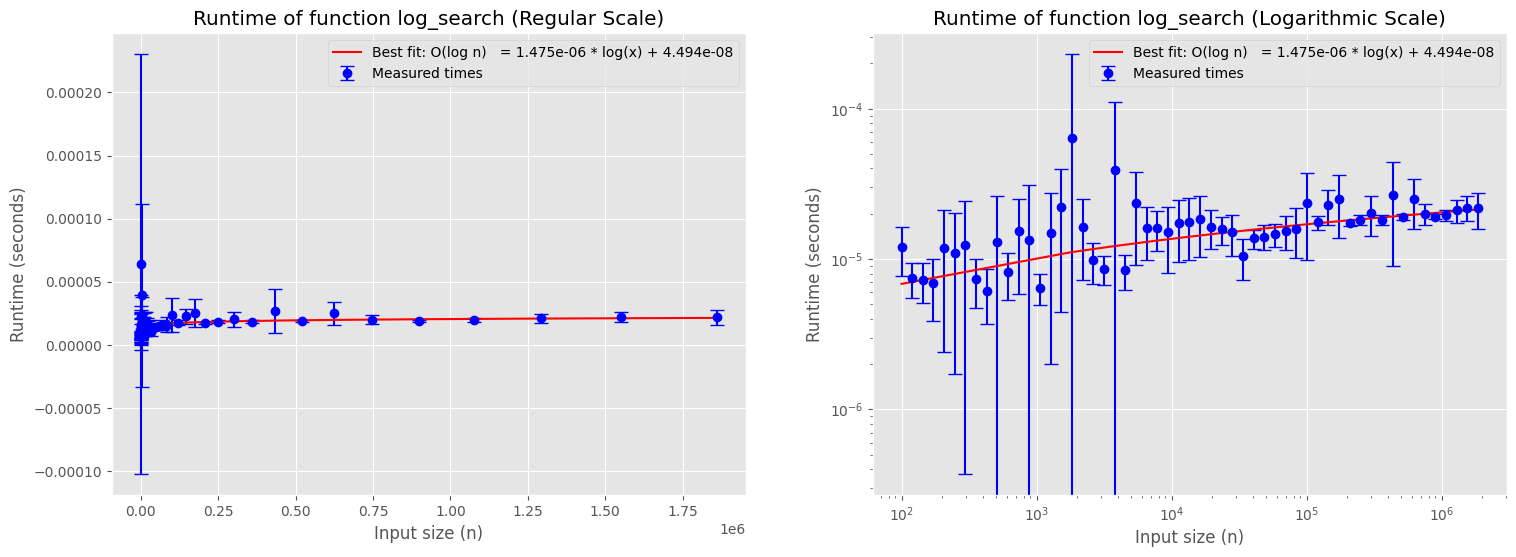

Time complexity of the function log_search is O(log n)
Time = 1.475e-06 * log(x) + 4.494e-08 (sec)


In [11]:
def log_search(input_data: list, key: int=0) -> int:
    left = 0
    right = len(input_data) - 1
    while left < right:
        middle = (left + right) // 2
        if input_data[middle] == key:
            return middle
        elif input_data[middle] < key:
            left = middle + 1
        else:
            right = middle - 1
    return -1

def random_sorted_data(n: int) -> list:
    x = np.random.uniform(-1, 1, n)
    # x = np.random.randint(-n, n, n)
    x = np.sort(x)
    return x

_ = deduce(log_search, random_sorted_data, time_budget=10, num_samples=10, step=lambda n: int(n * 1.2), start=100)

2024-07-20 20:33:41,314 - Collecting data for insertion_sort...
2024-07-20 20:33:41,315 - Iteration   0. Input length: 100, Avg time: 5.804e-06 ± 2.438e-06 seconds
2024-07-20 20:33:41,317 - Iteration   1. Input length: 110, Avg time: 7.676e-06 ± 4.374e-06 seconds
2024-07-20 20:33:41,319 - Iteration   2. Input length: 121, Avg time: 6.165e-06 ± 2.128e-06 seconds
2024-07-20 20:33:41,321 - Iteration   3. Input length: 133, Avg time: 1.39e-05 ± 9.13e-06 seconds
2024-07-20 20:33:41,324 - Iteration   4. Input length: 146, Avg time: 2.093e-05 ± 1.89e-05 seconds
2024-07-20 20:33:41,325 - Iteration   5. Input length: 160, Avg time: 8.263e-06 ± 1.843e-06 seconds
2024-07-20 20:33:41,327 - Iteration   6. Input length: 176, Avg time: 9.235e-06 ± 1.848e-06 seconds
2024-07-20 20:33:41,331 - Iteration   7. Input length: 193, Avg time: 1.487e-05 ± 4.468e-06 seconds
2024-07-20 20:33:41,334 - Iteration   8. Input length: 212, Avg time: 2.882e-05 ± 3.73e-05 seconds
2024-07-20 20:33:41,337 - Iteration   9.

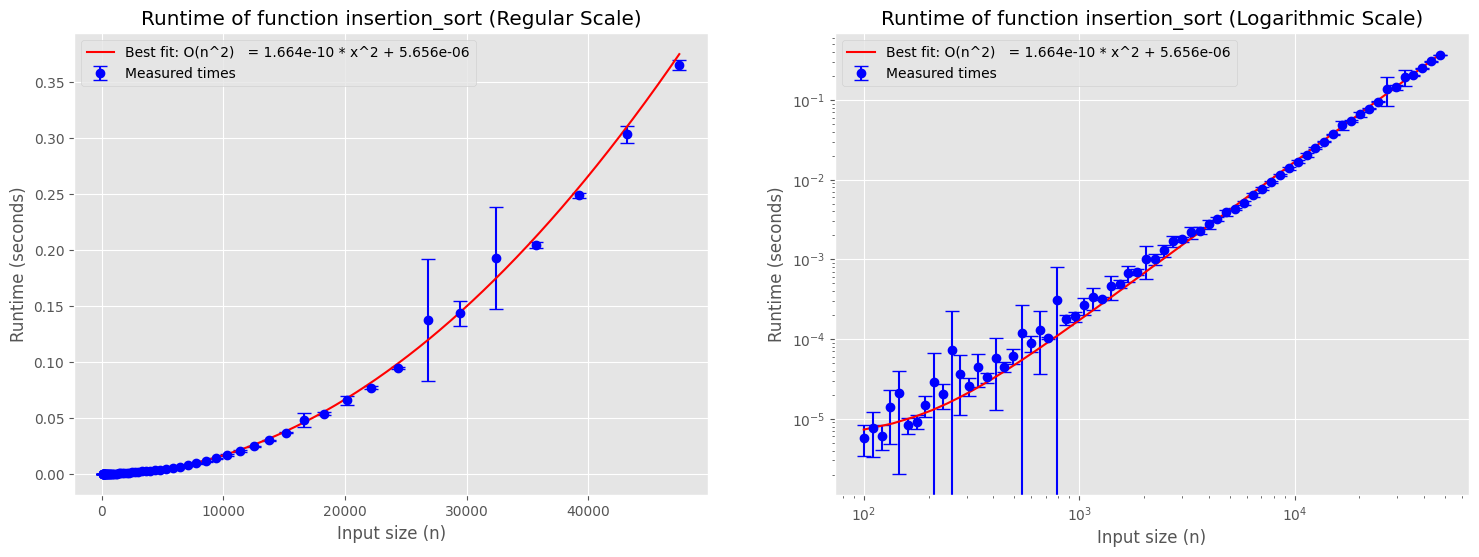

Time complexity of the function insertion_sort is O(n^2)
Time = 1.664e-10 * x^2 + 5.656e-06 (sec)


In [12]:
@numba.njit
def insertion_sort(input_data: list) -> None:
    for i in range(1, len(input_data)):
        j = i
        while j > 0 and input_data[j - 1] > input_data[j]:
            input_data[j - 1], input_data[j] = input_data[j], input_data[j - 1]
            j -= 1

insertion_sort(random_data(50))  # Warm up for numba.jit
solver, n, t = deduce(insertion_sort, random_data, time_budget=20, num_samples=10, step=lambda n: int(n * 1.1), start=100)

2024-07-20 20:34:15,230 - Collecting data for sort...
2024-07-20 20:34:15,234 - Iteration   0. Input length: 100, Avg time: 8.495e-05 ± 7.511e-05 seconds
2024-07-20 20:34:15,236 - Iteration   1. Input length: 110, Avg time: 5.584e-05 ± 8.104e-05 seconds
2024-07-20 20:34:15,239 - Iteration   2. Input length: 121, Avg time: 0.0001094 ± 0.0001738 seconds
2024-07-20 20:34:15,241 - Iteration   3. Input length: 133, Avg time: 4.015e-05 ± 6.206e-05 seconds
2024-07-20 20:34:15,245 - Iteration   4. Input length: 146, Avg time: 7.363e-05 ± 0.0001217 seconds
2024-07-20 20:34:15,247 - Iteration   5. Input length: 160, Avg time: 5.262e-05 ± 5.384e-05 seconds
2024-07-20 20:34:15,251 - Iteration   6. Input length: 176, Avg time: 5.231e-05 ± 8.466e-05 seconds
2024-07-20 20:34:15,253 - Iteration   7. Input length: 193, Avg time: 3.425e-05 ± 3.991e-05 seconds
2024-07-20 20:34:15,261 - Iteration   8. Input length: 212, Avg time: 9.971e-05 ± 0.0001257 seconds
2024-07-20 20:34:15,263 - Iteration   9. Input

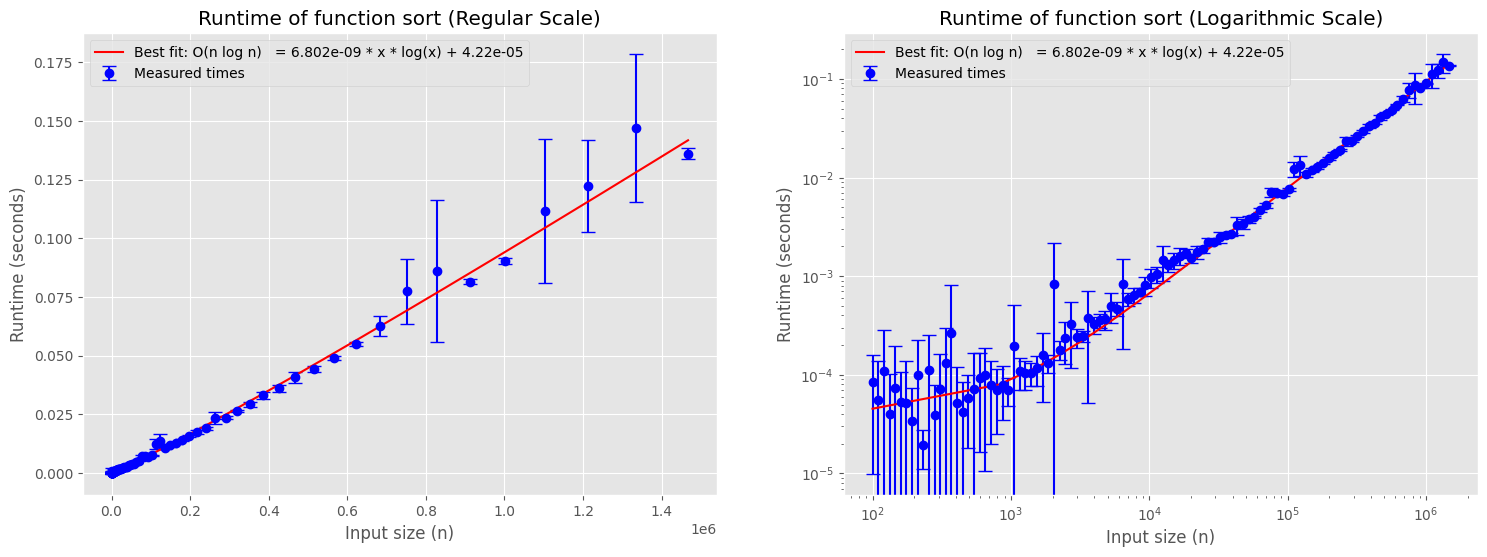

Time complexity of the function sort is O(n log n)
Time = 6.802e-09 * x * log(x) + 4.22e-05 (sec)


In [13]:

solver, n, t = deduce(np.sort, random_data, time_budget=20, num_samples=10, step=lambda n: int(n * 1.1), start=100)

In [14]:
solver(10)

4.23587849337444e-05

2024-07-20 20:35:58,643 - Collecting data for empty_function...
2024-07-20 20:35:58,650 - Iteration   0. Input length: 64, Avg time: 1.149e-06 ± 6.708e-07 seconds
2024-07-20 20:35:58,652 - Iteration   1. Input length: 70, Avg time: 5.343e-07 ± 3.119e-07 seconds
2024-07-20 20:35:58,654 - Iteration   2. Input length: 77, Avg time: 7.85e-07 ± 9.199e-07 seconds
2024-07-20 20:35:58,658 - Iteration   3. Input length: 84, Avg time: 1.105e-06 ± 8.557e-07 seconds
2024-07-20 20:35:58,662 - Iteration   4. Input length: 92, Avg time: 7.707e-07 ± 5.742e-07 seconds
2024-07-20 20:35:58,665 - Iteration   5. Input length: 101, Avg time: 5.921e-07 ± 3.481e-07 seconds
2024-07-20 20:35:58,670 - Iteration   6. Input length: 111, Avg time: 1.226e-06 ± 1.161e-06 seconds
2024-07-20 20:35:58,673 - Iteration   7. Input length: 122, Avg time: 2.104e-06 ± 3.755e-06 seconds
2024-07-20 20:35:58,678 - Iteration   8. Input length: 134, Avg time: 6.875e-07 ± 4.695e-07 seconds
2024-07-20 20:35:58,689 - Iteration   9. I

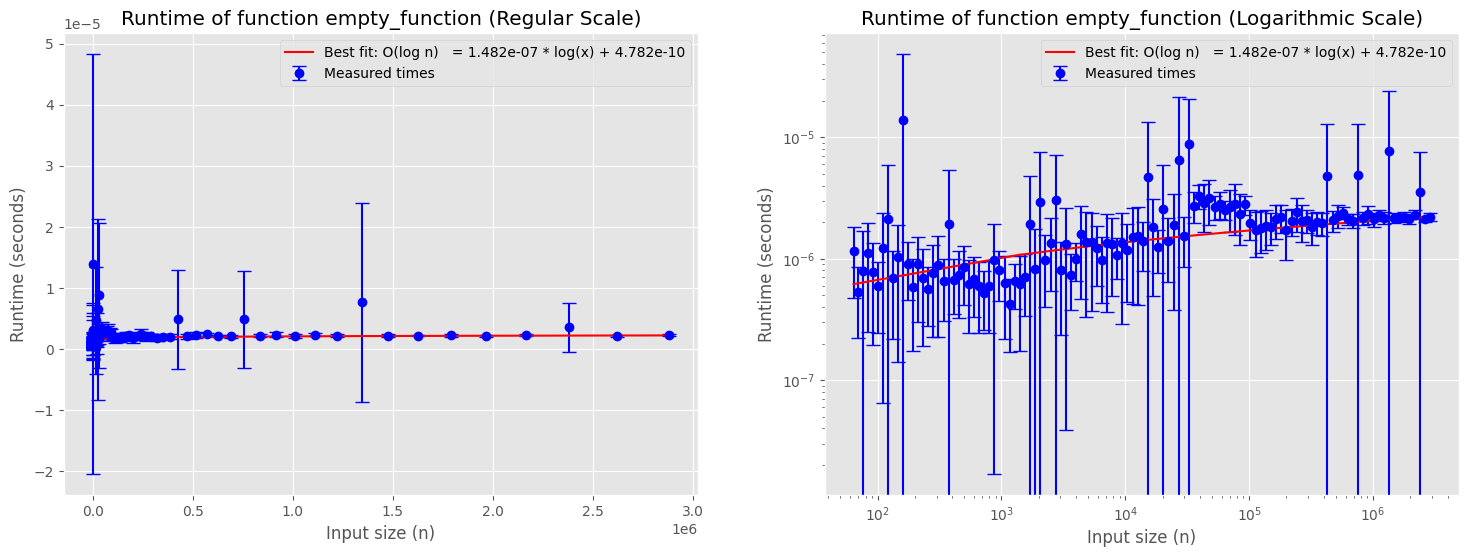

Time complexity of the function empty_function is O(log n)
Time = 1.482e-07 * log(x) + 4.782e-10 (sec)


In [17]:
def empty_function(x):
    pass
_ = deduce(empty_function, random_data)